概要：

In [8]:
import tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import layers, optimizers, datasets
import pandas as pd

In [9]:
dataset_path = keras.utils.get_file("auto-mpg.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [10]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
'Acceleration', 'Model Year', 'Origin']

In [11]:
raw_dataset = pd.read_csv(dataset_path, names=column_names,
na_values = "?", comment='\t',
sep=" ", skipinitialspace=True)

In [12]:
dataset = raw_dataset.copy()

In [13]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [14]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [16]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(40,25))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000692C518>,
      dtype=object)

In [10]:
corr_matric = dataset.corr()
corr_matric

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
Displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
Acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
Model Year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
Origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000341D7D30>,
      dtype=object)

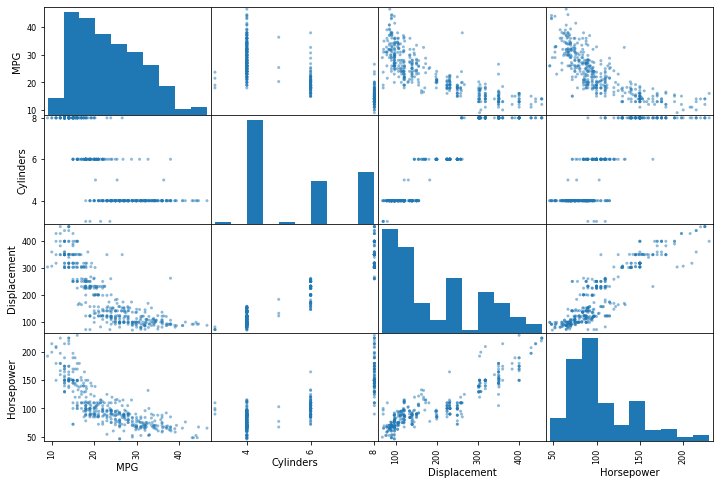

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["MPG", "Cylinders", "Displacement",
              "Horsepower"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

我们看到，MPG和马达数，马力，排量成反比关系。

In [18]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

马力数据项有6个是NULL值，比较少，直接删除：

In [19]:
dataset = dataset.dropna()

In [20]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

NULL数据项被删除了。

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Model Year      392 non-null int64
Origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [23]:
origin = dataset.pop("Origin")
dataset["USA"] = (origin==1)*1.0

In [24]:
dataset["Europe"] = (origin==2)*1.0
dataset["Japan"] = (origin==3)*1.0

In [25]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


切分数据集，分为训练集和测试集：

In [26]:
train_dataset = dataset.sample(frac=0.8, random_state=0)

In [27]:
test_dataset = dataset.drop(train_dataset.index)

将MPG字段移出数据集：

In [28]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 146 to 182
Data columns (total 10 columns):
MPG             314 non-null float64
Cylinders       314 non-null int64
Displacement    314 non-null float64
Horsepower      314 non-null float64
Weight          314 non-null float64
Acceleration    314 non-null float64
Model Year      314 non-null int64
USA             314 non-null float64
Europe          314 non-null float64
Japan           314 non-null float64
dtypes: float64(8), int64(2)
memory usage: 27.0 KB


In [29]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

标准化数据：

In [30]:
train_stats = train_dataset.describe()

In [31]:
train_stats = train_stats.transpose()
train_stats.head()

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8


数据标准化：

In [32]:
def norm(x):
    return (x-train_stats["mean"])/train_stats["std"]

train_dataset = norm(train_dataset)
test_dataset = norm(test_dataset)

In [33]:
train_db = tf.data.Dataset.from_tensor_slices((train_dataset.values, train_labels.values))

In [34]:
train_db = train_db.shuffle(100).batch(32)

创建网络：

In [35]:
class Network(keras.Model):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')
        self.fc3 = layers.Dense(1)
    
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x
        

In [36]:
model = Network()
model.build(input_shape=(4, 9))

In [37]:
model.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  640       
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [39]:
optimizers = tf.keras.optimizers.RMSprop(0.001)

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
train_mae_losses = []
test_mae_losses = []

In [44]:
for epoch in range(200):
    for step, (x,y) in enumerate(train_db):
        with tf.GradientTape() as tape:
            out = model(x)
            loss = tf.reduce_mean(keras.losses.MSE(y, out))
            mae_loss = tf.reduce_mean(keras.losses.MAE(y, out))
            
        if step % 10 == 0:
            print(epoch, step, float(loss))
            
        grads = tape.gradient(loss, model.trainable_variables)
        optimizers.apply_gradients(zip(grads, model.trainable_variables))
        
    train_mae_losses.append(float(mae_loss))
    test_out = model(tf.constant(test_dataset.values))
    test_mae_losses.append(tf.reduce_mean(keras.losses.MAE(test_labels, test_out)))
    

0 0 571.7352294921875
1 0 503.76202392578125
2 0 430.57757568359375
3 0 354.5826416015625
4 0 282.6965637207031
5 0 221.41397094726562
6 0 175.5919189453125
7 0 145.7165069580078
8 0 127.43185424804688
9 0 114.68366241455078
10 0 104.3622817993164
11 0 96.14360046386719
12 0 90.06875610351562
13 0 85.85919189453125
14 0 82.95524597167969
15 0 80.9122314453125
16 0 79.42561340332031
17 0 78.34532928466797
18 0 77.56427001953125
19 0 76.97782135009766
20 0 76.53842163085938
21 0 76.20501708984375
22 0 75.93704223632812
23 0 75.7269058227539
24 0 75.55239868164062
25 0 75.407958984375
26 0 75.28396606445312
27 0 75.17668151855469
28 0 75.08598327636719
29 0 74.9994125366211
30 0 74.92516326904297
31 0 74.8616714477539
32 0 74.8026123046875
33 0 74.75
34 0 74.70093536376953
35 0 74.65628051757812
36 0 74.61491394042969
37 0 74.57588195800781
38 0 74.54017639160156
39 0 74.5081558227539
40 0 74.47750091552734
41 0 74.44877624511719
42 0 74.42234802246094
43 0 74.39701843261719
44 0 74.37225

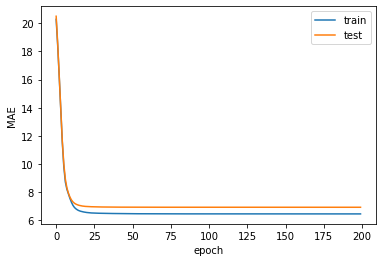

In [46]:
plt.figure()
plt.ylabel("MAE")
plt.xlabel("epoch")
plt.plot(train_mae_losses, label="train")

plt.plot(test_mae_losses, label="test")
plt.legend()
plt.show()